In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
# Assuming df is the loaded dataframe
df = pd.read_csv("../data/store.csv")  

In [3]:
# Converting non-numeric columns to numeric
df['PromoInterval'] = df['PromoInterval'].replace(0, '0')  # Ensure uniformity in StateHoliday column
label_encoder = LabelEncoder()
df['PromoInterval'] = label_encoder.fit_transform(df['PromoInterval'])
df['StoreType'] = label_encoder.fit_transform(df['StoreType'])
df['Assortment'] = label_encoder.fit_transform(df['Assortment'])

In [4]:
# Handle Missing Values
# Fill missing values for numeric columns
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(0)
df.fillna({'CompetitionDistance' : df['CompetitionDistance'].median()}, inplace=True)
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)

In [5]:
# Step 2: Convert Categorical Features into Numeric (One-Hot Encoding)
categorical_features = ['StoreType', 'Assortment', 'PromoInterval']

In [6]:
# Handling missing/empty PromoInterval
df['PromoInterval'] = df['PromoInterval'].replace('', 'None')

In [7]:
# Scaling the Data
# Numerical columns to scale
numerical_features = ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                      'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']

In [8]:
# Define the preprocessor with scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [9]:
# Apply the preprocessor to transform the dataset
X_preprocessed = preprocessor.fit_transform(df)

# Retrieve column names for the encoded features
onehot_encoded_columns = list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))

# Combine numerical and encoded column names
preprocessed_columns = numerical_features + onehot_encoded_columns

# Create a DataFrame from the preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=preprocessed_columns)

# Display the first few rows of the preprocessed data
print(X_preprocessed_df.head())

      Store  CompetitionDistance  CompetitionOpenSinceMonth  \
0 -1.730498            -0.539351                   0.950048   
1 -1.727391            -0.630841                   1.417010   
2 -1.724284             1.141458                   1.650491   
3 -1.721178            -0.624306                   0.950048   
4 -1.718071             3.203912                  -0.217357   

   CompetitionOpenSinceYear    Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                 -0.108021 -1.024516        -0.777805        -1.024515   
1                 -0.269522  0.976071         0.059001         0.974317   
2                 -0.431023  0.976071         0.123370         0.975311   
3                  0.053480 -1.024516        -0.777805        -1.024515   
4                  1.022486 -1.024516        -0.777805        -1.024515   

   StoreType_0  StoreType_1  StoreType_2  StoreType_3  Assortment_0  \
0          0.0          0.0          1.0          0.0           1.0   
1          1.0          0.0 

# Step 2: Building Models with sklearn Pipelines
Next, we create a regression model using RandomForest with sklearn Pipelines.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Features and target
X = df.drop(columns=['CompetitionDistance', 'CompetitionOpenSinceMonth'])  # Dropping target and date column
y = df['CompetitionDistance']



In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Defining the model pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))  # RandomForest
])




In [13]:
# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Step 3: Choosing a Loss Function
For this regression task, Mean Absolute Error (MAE) is a good candidate for the loss function because it's more interpretable and not as sensitive to outliers as Mean Squared Error (MSE).

In [14]:
from sklearn.metrics import mean_absolute_error

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 4969.5130044843045


# Step 4: Post-Prediction Analysis (Feature Importance and Confidence Interval)

In [15]:
# Feature importance from RandomForest
import matplotlib.pyplot as plt
import seaborn as sns

importance = pipeline.named_steps['rf'].feature_importances_
features = X.columns

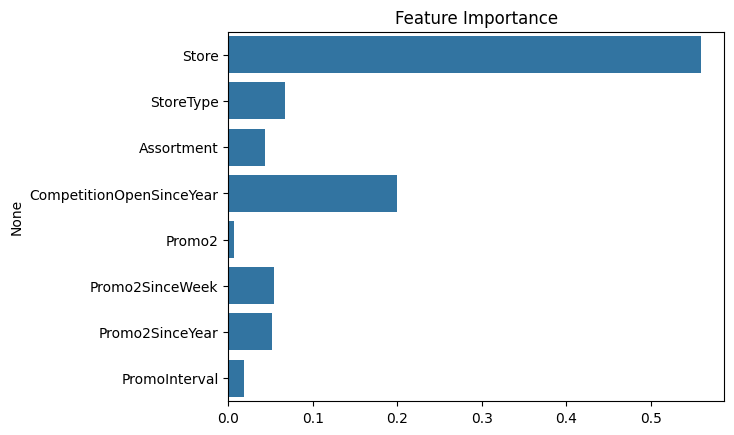

Confidence Interval: (array([ -5526.6187182 ,  -8493.28648568,  -9538.82890865,   1134.5042086 ,
        -8221.22890865, -10912.42890865,  -4826.38684093,  -5794.99680773,
          204.99037386,  -2790.33534551,  -7262.48648568,  -6321.48648568,
        -4873.71038539, -10097.82890865,  -7219.79680773,  -3881.11038539,
       -11004.03946641,  -7389.6957914 , -10179.83946641,  -8194.48648568,
        16082.86465449,  -6702.17156661,  -6830.79680773,   4426.97109135,
        -9226.59680773,  -4598.62095667,  -9306.02890865,  -8629.68648568,
        -4536.31862025,  -6456.79680773, -10791.62890865, -10640.42890865,
        -7719.62890865,  -4166.39573731,  -6177.48648568,  -8862.19680773,
        -7170.99680773, -11304.8957914 ,  -7227.77156661,    357.60319227,
         6305.66465449,  -5986.22095667,  -9177.03946641,  -4640.57156661,
        -8282.83946641,  -1638.02095667,  -8471.08648568,   2399.60319227,
         4316.17904333,  -3625.22890865,  -3562.02890865,  -8524.62890865,
   

c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-04_Pharamatical_Sales\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-04_Pharamatical_Sales\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-04_Pharamatical_Sales\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Hello\Desktop\Html Tutorial\Document\KAIM Courses\Week-04_Pharamatical_Sales\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\Hello\Desktop\Html Tutorial\Doc

In [17]:
# Plotting feature importance
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.show()

# Confidence Interval Estimation (example using standard deviation)
y_std = np.std([tree.predict(X_test) for tree in pipeline.named_steps['rf'].estimators_], axis=0)
confidence_interval = (y_pred - 1.96 * y_std, y_pred + 1.96 * y_std)
print(f'Confidence Interval: {confidence_interval}')


# Step 6: Deep Learning Model with LSTM
For this step, we will use TensorFlow/Keras to build an LSTM model to predict future sales.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Preprocessing the data for LSTM
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(df[['Sales']])

In [ ]:
# Creating time-series data (window-based data)
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # Using a 30-day window
X_lstm, y_lstm = create_dataset(scaled_data, window_size)

In [ ]:
# Reshaping for LSTM (samples, timesteps, features)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

In [ ]:
# Building LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fit the model
model.fit(X_lstm, y_lstm, epochs=10, batch_size=32)

In [ ]:
# Predicting
y_lstm_pred = model.predict(X_lstm)

# Inverse scaling
y_lstm_pred_rescaled = scaler.inverse_transform(y_lstm_pred)